In [1]:
import tensorflow as tf
import numpy as np
from skimage import data as imgdata
import matplotlib.pyplot as plt

sess = tf.InteractiveSession()

### Get the Data

> Get the data and store the pixel values as an array.

In [2]:
img = imgdata.camera().astype(np.float32)
img

array([[ 156.,  157.,  160., ...,  152.,  152.,  152.],
       [ 156.,  157.,  159., ...,  152.,  152.,  152.],
       [ 158.,  157.,  156., ...,  152.,  152.,  152.],
       ..., 
       [ 121.,  123.,  126., ...,  121.,  113.,  111.],
       [ 121.,  123.,  126., ...,  121.,  113.,  111.],
       [ 121.,  123.,  126., ...,  121.,  113.,  111.]], dtype=float32)

### Plot the Data

> Plot the data in whatever way you would like to perceive the data.

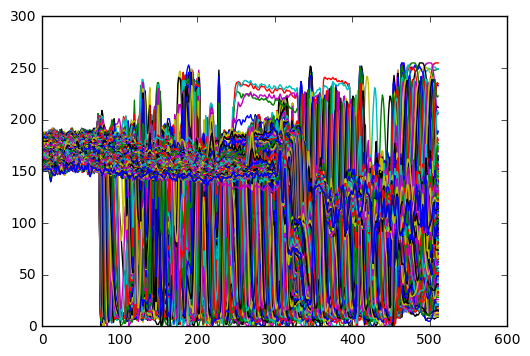

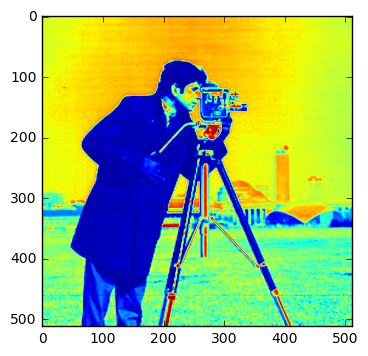

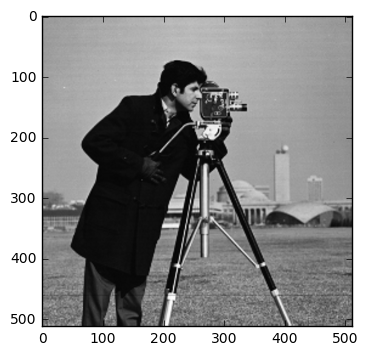

In [3]:
plt.plot(img)
plt.show()
plt.imshow(img)
plt.show()
plt.imshow(img, cmap = "gray")
plt.show()

In [4]:
img.shape

(512, 512)

>To perform 2D convolution  with TensorFlow we need our images to be four-dimensional.

>The resulting image from this convolution would have images with the following parameters : 

>The number of images, width, height, channels

### Convolution

> We convert our present image into a four dimensional image

In [5]:
img4d = tf.reshape(img,[1,img.shape[0],img.shape[1],1])
print(img4d)
print(img4d.eval())

Tensor("Reshape:0", shape=(1, 512, 512, 1), dtype=float32)
[[[[ 156.]
   [ 157.]
   [ 160.]
   ..., 
   [ 152.]
   [ 152.]
   [ 152.]]

  [[ 156.]
   [ 157.]
   [ 159.]
   ..., 
   [ 152.]
   [ 152.]
   [ 152.]]

  [[ 158.]
   [ 157.]
   [ 156.]
   ..., 
   [ 152.]
   [ 152.]
   [ 152.]]

  ..., 
  [[ 121.]
   [ 123.]
   [ 126.]
   ..., 
   [ 121.]
   [ 113.]
   [ 111.]]

  [[ 121.]
   [ 123.]
   [ 126.]
   ..., 
   [ 121.]
   [ 113.]
   [ 111.]]

  [[ 121.]
   [ 123.]
   [ 126.]
   ..., 
   [ 121.]
   [ 113.]
   [ 111.]]]]


### Convolution Kernels

>Convolution Kernel Dimensions

>Kernel Height, Kernel Width, Channels, number of convolutional filters

In [6]:
# using a Gaussian Kernel
mean = 0.0 
sigma = 1.0

x = tf.linspace(-5.0,5.0,100)
z = (tf.exp(tf.neg((tf.pow(x-mean,2.0) /
                   2.0 * tf.pow(sigma , 2.0)))) * (1.0 / sigma*tf.sqrt(tf.multiply(2.0 , 3.1415))))

onedsize = z.get_shape().as_list()[0] #here we get the shape for the array of values created
twodz = tf.multiply(tf.reshape(z,[onedsize,1]),tf.reshape(z,[1,onedsize]))
# we multiply z with its transpose to get a n by n matrix

fourdz = tf.reshape(twodz, [onedsize,onedsize,1,1]) #this is a kernel

print(fourdz.get_shape().as_list())

[100, 100, 1, 1]


> lets use this Gaussian Kernel to convolve an image

In [7]:
convolve = tf.nn.conv2d(img4d,fourdz,strides=[1,1,1,1],padding="SAME")

In [8]:
res = convolve.eval()
print(res.shape)

(1, 512, 512, 1)


> We have to change the image back to a two-dimensional array

Original Image Value DIstribution


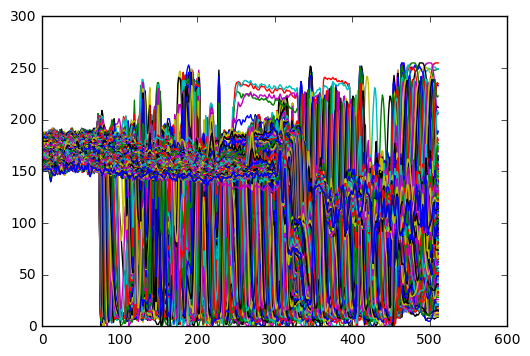

Convolved Image Value Distribution


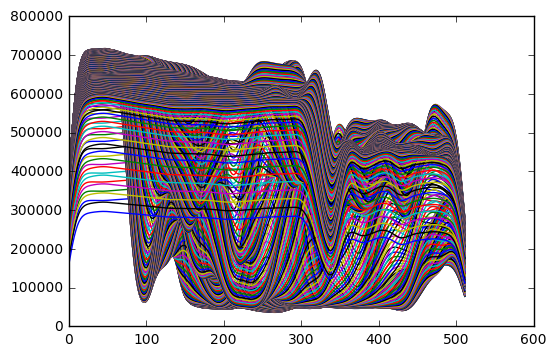

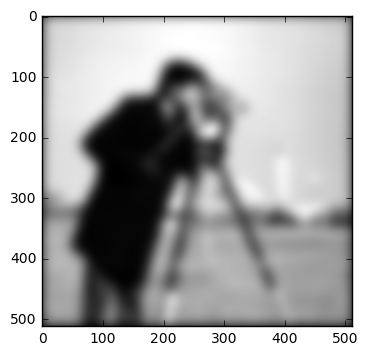

In [9]:
print("Original Image Value DIstribution")
plt.plot(img)
plt.show()
print("Convolved Image Value Distribution")
plt.plot(np.squeeze(res))
plt.show()
plt.imshow(np.squeeze(res),cmap='gray')
plt.show()